In [ ]:
# pip install heuristicsearch

In [1]:
from heuristicsearch.a_star_search import AStar

print("Graph 1")

heuristic = {'A':1,'B':1,'C':11,'D':1}

adjacency_list = {'A':[('B',1),('C',3),('D',7)],'B':[('D',5)],'C':[('D',12)]}

graph = AStar(adjacency_list,heuristic)
graph.apply_a_star(start='A',stop='D')

Graph 1
Path
A -> B -> D
Cost
0 -> 1 -> 6


# 2 AO* Algorithm

In [3]:
#AO* Algorithm
from heuristicsearch.ao_star import AOStar
print("graph-1")
heuristic={'A':1,'B':6,'C':12,'D':10,'E':4,'G':5,'H':7}

adjacent_list={
    'A':[[('B',1),('C',1)],[('D',1)]],'B':[['G',1],[('H',1)]],'C':[['J',1]],'D':[[('E',1),('F',1)]],'G':[[('I'),1]]
}

graph = AOStar(adjacent_list,heuristic,'A')
graph.applyAOStar()

graph-1
PROCESSING NODE : A
-----------------------------------------------------------------------------------------
11 ['D']

PROCESSING NODE : D
-----------------------------------------------------------------------------------------
6 ['E', 'F']

PROCESSING NODE : A
-----------------------------------------------------------------------------------------
7 ['D']

PROCESSING NODE : E
-----------------------------------------------------------------------------------------
0 []

PROCESSING NODE : D
-----------------------------------------------------------------------------------------
2 ['E', 'F']

PROCESSING NODE : A
-----------------------------------------------------------------------------------------
3 ['D']

PROCESSING NODE : F
-----------------------------------------------------------------------------------------
0 []

PROCESSING NODE : D
-----------------------------------------------------------------------------------------
2 ['E', 'F']

PROCESSING NODE : A
----------

# 3 CNN alagorithm

In [4]:
# skip this 
import csv

with open("/content/drive/MyDrive/Data sets /trainingexamples.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        if i[-1] == "Yes":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "No":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)

# 4 ID3 algorithm

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal length (cm) <= 4.95
|   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- class: 2



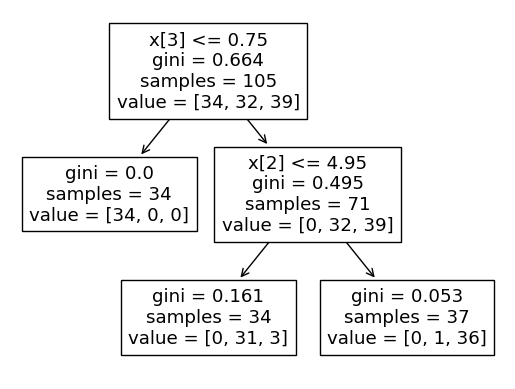

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_text

clf = DecisionTreeClassifier(random_state=0,max_depth=2)
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
clf.fit(X_train,y_train)
plot_tree(clf)
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

# 5 Back Propogation

In [9]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000                #Setting training iterations
lr=0.1                    #Setting learning rate
inputlayer_neurons = 2    #number of features in data set
hiddenlayer_neurons = 3   #number of hidden layers neurons
output_neurons = 1        #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    
#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    
#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    
# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    
    
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89785596]
 [0.87484398]
 [0.89639647]]


# 6 Naive Bayesian classifier

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Load Data from CSV
data = pd.read_csv('/content/drive/MyDrive/Data sets /data.csv')
print("The first 5 Values of data is :\n", data.head())


In [ ]:
# obtain train data and train output
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())

In [ ]:
y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())

In [ ]:
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))

In [ ]:
# convert them in numbers
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train output is\n", X.head())


# 7 EM algorithm

c:\Users\kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


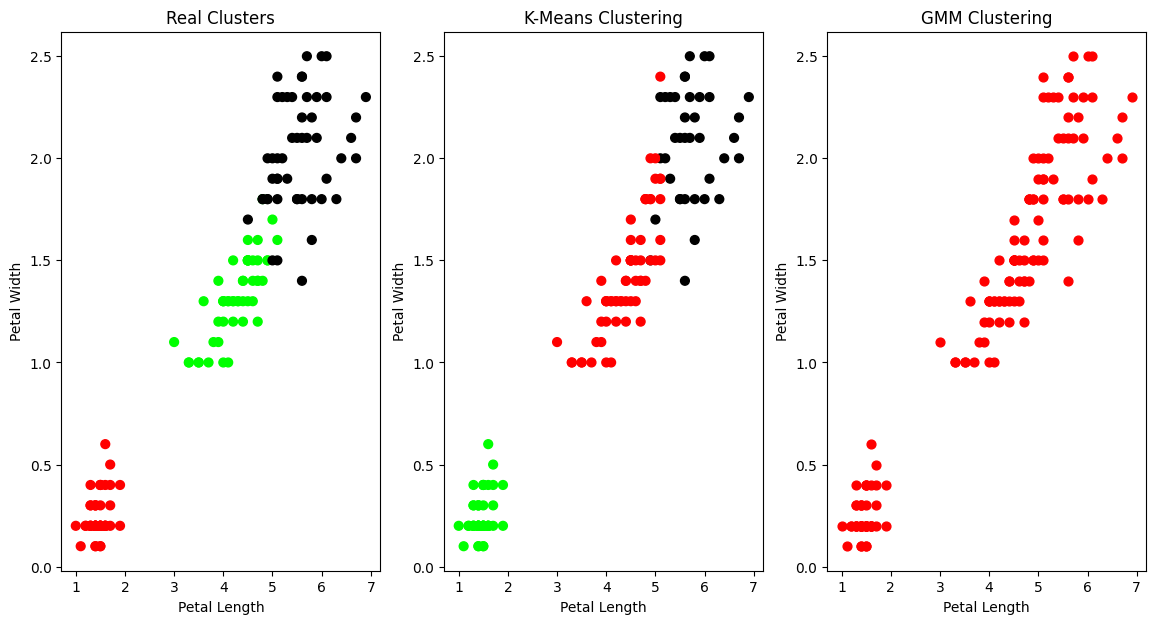

In [10]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=40) 
gmm.fit(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

# 8 K Nearest Neighbour

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
iris=datasets.load_iris() 
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ") 
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

    print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [5.6 2.8 4.9 2. ]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.8666666666666667
 Sample: [5.  3.5 1.3 0.3]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 0.8666666666666667
 Sample: [7.2 3.6 6.1 2.5]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.8666666666666667
 Sample: [6.8 3.  5.5 2.1]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.8666666666666667
 Sample: [5.  3.2 1.2 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 0.8666666666666667
 Sample: [4.9 2.5 4.5 1.7]  Actual-label: 2  Predicted-label: 1
Classification Accuracy : 0.8666666666666667
 Sample: [6.7 3.  5.2 2.3]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.8666666666666667
 Sample: [7.9 3.8 6.4 2. ]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.8666666666666667

# 9 Locally weighted Regression

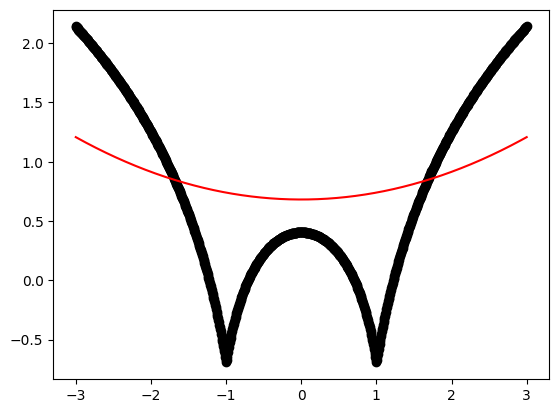

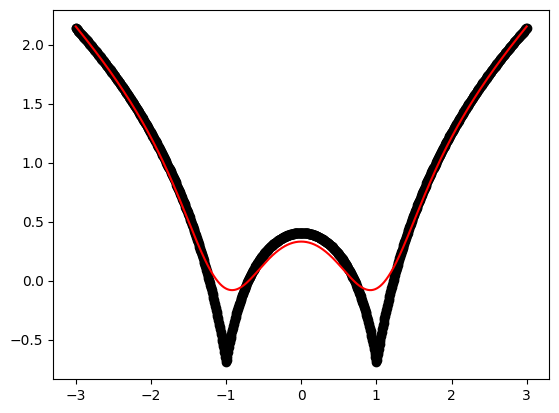

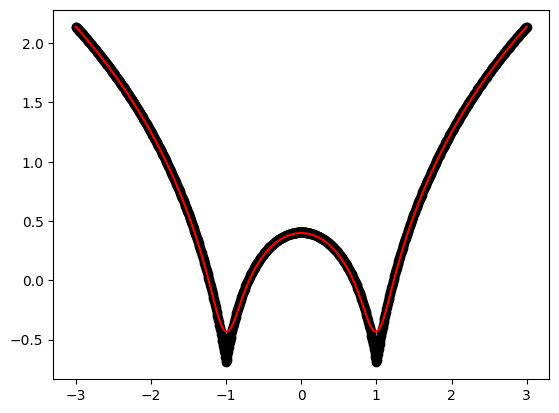

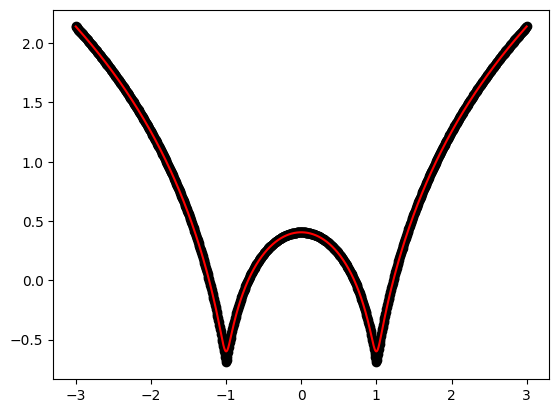

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0, X, Y, tau):
    x0 = [1, x0]   
    X = [[1, i] for i in X]
    X = np.asarray(X)
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau))
    beta = np.linalg.pinv(xw @ X) @ xw @ Y @ x0  
    return beta    

def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(X, Y, 'o', color='black')
    plt.plot(domain, prediction, color='red')
    plt.show()

X = np.linspace(-3, 3, num=1000)
domain = X
Y = np.log(np.abs(X ** 2 - 1) + .5)

draw(10)
draw(0.1)
draw(0.01)
draw(0.001)